In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:

#Variable Definition
# id	Unique ID
# week	Week No
# center_id	Unique ID for fulfillment center
# meal_id	Unique ID for Meal
# checkout_price	Final price including discount, taxes & delivery charges
# base_price	Base price of the meal
# emailer_for_promotion	Emailer sent for promotion of meal
# homepage_featured	Meal featured at homepage
# num_orders	(Target) Orders Count

In [259]:
df1 = pd.read_csv(r'traindata.csv')

In [4]:
df2 = pd.read_csv(r'meal_info.csv')

In [5]:
df3 = pd.read_csv(r'fulfilment_center_info.csv')

In [6]:
df1.head(1)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177


In [7]:
df2.head(1)

,meal_id,category,cuisine
0,1885,Beverages,Thai


In [8]:
df3.head(1)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7


In [9]:
#analysis

In [10]:
df1

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [12]:
df1.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

<AxesSubplot:>

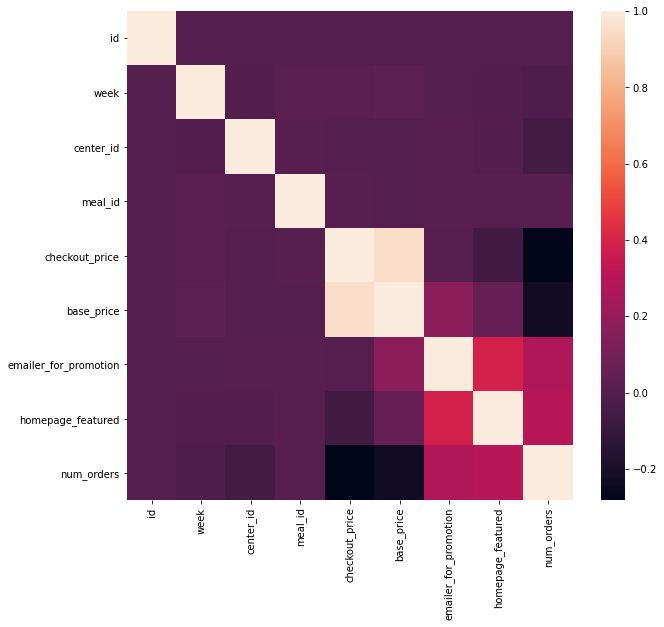

In [13]:
plt.figure(figsize=(10,9))
sns.heatmap(df1.corr())

In [14]:
corr = df1.corr()

In [15]:
corr['num_orders']

id                       0.000702
week                    -0.017210
center_id               -0.053035
meal_id                  0.010597
checkout_price          -0.282108
base_price              -0.222306
emailer_for_promotion    0.277147
homepage_featured        0.294490
num_orders               1.000000
Name: num_orders, dtype: float64

In [16]:
#no preprossecing train model

In [17]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df1.iloc[:,:-1]

In [20]:
y = df1.iloc[:,-1]

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20)

In [22]:
random = RandomForestRegressor()
ada = AdaBoostRegressor()
grad = GradientBoostingRegressor()
tree = DecisionTreeRegressor()

In [26]:
ytest

46654      40
127774     26
99295     311
168778     42
249547     68
         ... 
455688     96
19589     662
396603    446
34457     757
356830     27
Name: num_orders, Length: 91310, dtype: int64

In [27]:
random.fit(xtrain,ytrain)

RandomForestRegressor()

In [ ]:
ada.fit(xtrain,ytrain)

In [ ]:
grad.fit(xtrain,ytrain)

In [ ]:
tree.fit(xtrain,ytrain)

In [28]:
random.score(xtrain,ytrain)

0.9697806367686097

In [29]:
random.score(xtest,ytest)

0.7791415055322584

In [38]:
from sklearn.metrics import mean_squared_error

In [33]:
pred = random.predict(xtest)

In [39]:
mean_squared_error(ytest,pred)

34568.69502657431

In [40]:
#preprocessing

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='checkout_price'>

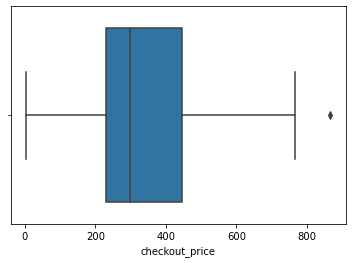

In [43]:
sns.boxplot(df1['checkout_price'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='checkout_price', ylabel='Density'>

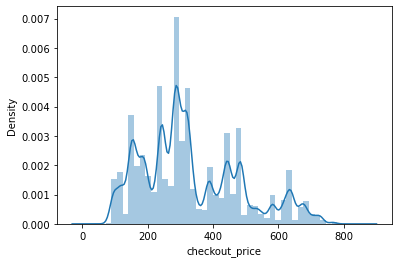

In [44]:
sns.distplot(df1['checkout_price'])

In [46]:
from scipy.stats import skew

In [260]:
skew(df1['checkout_price'])

0.6723276957570572

In [261]:
df1['checkout_price'] = np.log(df1['checkout_price'])

In [262]:
skew(df1['checkout_price'])

-0.2837295221690906

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='checkout_price', ylabel='Density'>

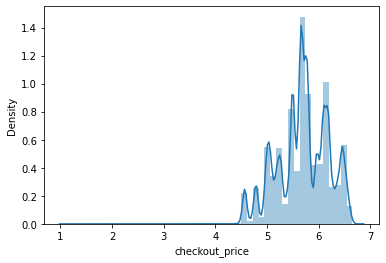

In [263]:
sns.distplot(df1['checkout_price'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='checkout_price'>

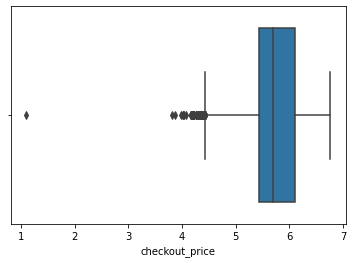

In [264]:
sns.boxplot(df1['checkout_price'])

In [265]:
q1 = df1['checkout_price'].quantile(0.25)

In [266]:
q3 = df1['checkout_price'].quantile(0.75)

In [267]:
iqr = q3-q1

In [268]:
l = q1 - 1.5 * iqr
l

4.435872593894008

In [269]:
h = q3 + 1.5 * iqr
h

7.096222047784934

In [270]:

df1 = df1[(df1['checkout_price'] > 4.43)]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='checkout_price'>

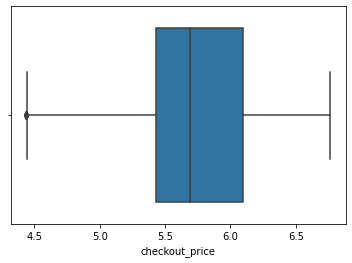

In [271]:
sns.boxplot(df1['checkout_price'])

In [272]:
skew(df1['checkout_price'])

-0.27915567777594336

In [273]:
#base_price

In [274]:
df1['base_price']

0         152.29
1         135.83
2         135.86
3         437.53
4         242.50
           ...  
456543    484.09
456544    482.09
456545    321.07
456546    313.34
456547    290.03
Name: base_price, Length: 456444, dtype: float64

In [275]:
skew(df1['base_price'])

0.6375238389365168

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='base_price'>

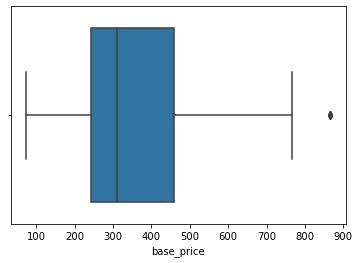

In [276]:
sns.boxplot(df1['base_price'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='base_price', ylabel='Density'>

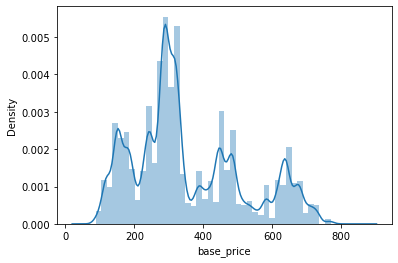

In [153]:
sns.distplot(df1['base_price'])

In [277]:
df1['base_price'] = np.log(df1['base_price'])

In [278]:
skew(df1['base_price'])

-0.22102225603166997

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='base_price', ylabel='Density'>

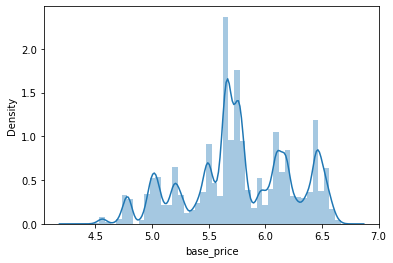

In [232]:
sns.distplot(df1['base_price'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='base_price'>

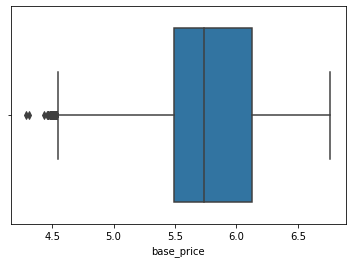

In [233]:
sns.boxplot(df1['base_price'])

In [279]:
q11 = df1['base_price'].quantile(0.25)

In [280]:
q33 = df1['base_price'].quantile(0.75)

In [281]:
iqr1 = q33 - q11

In [282]:
low = q11 - 1.5 * iqr1

In [283]:
low

4.541670184991059

In [284]:
high = q33 +1.5 * iqr1

In [285]:
high

7.084194871741953

In [286]:
df1 = df1[(df1['base_price'] > 4.54)]

In [287]:
skew(df1['base_price'])

-0.21499041306703406

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='base_price'>

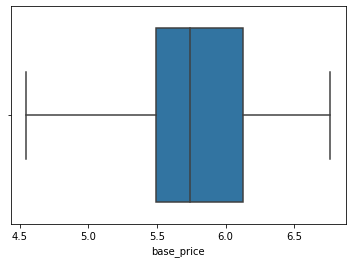

In [288]:
sns.boxplot(df1['base_price'])

In [289]:
df1.shape

(456114, 9)

In [201]:
#num_orders

In [290]:
skew(df1['num_orders'])

6.907722724379488

In [291]:
 df1['num_orders'] = np.log(df1['num_orders'])

In [292]:
skew(df1['num_orders'])

-0.04900411686260005

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_orders'>

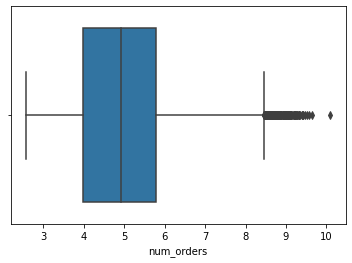

In [249]:
sns.boxplot(df1['num_orders'])

In [293]:
q111 = df1['num_orders'].quantile(0.25)

In [294]:
q333 = df1['num_orders'].quantile(0.75)

In [295]:
iqr33 = q333 - q111

In [296]:
low33 = q111 - 1.5 *iqr33

In [297]:
high33 = q33 +1.5 *iqr33

In [298]:
low33

1.3013448427221928

In [299]:
high33

8.81838731805245

In [ ]:
df1 = df1[(df1['base_price'] > 4.54)]

In [313]:
df1 = df1[(df1['num_orders'] < 8.0)]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_orders'>

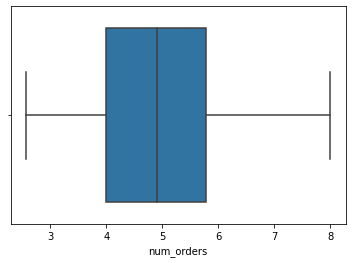

In [314]:
sns.boxplot(df1['num_orders'])

# 

In [315]:
df1

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,4.918739,5.025787,0,0,5.176150
1,1466964,1,55,1993,4.918739,4.911404,0,0,5.598422
2,1346989,1,55,2539,4.904237,4.911625,0,0,5.241747
3,1338232,1,55,2139,5.827474,6.081145,0,0,3.988984
4,1448490,1,55,2631,5.495117,5.491002,0,0,3.688879
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,6.182271,6.182271,0,0,4.219508
456544,1062036,145,61,2304,6.178131,6.178131,0,0,3.737670
456545,1110849,145,61,2664,5.470925,5.771659,0,0,6.216606
456546,1147725,145,61,2569,5.495117,5.747289,0,0,6.591674


In [319]:
x1 = df1.iloc[:,:-1]

In [321]:
y1 = df1.iloc[:,-1]

In [316]:
#now train model

In [322]:
x1train,x1test,y1train,y1test = train_test_split(x1,y1,test_size = 0.20)

In [323]:
random.fit(x1train,y1train)

RandomForestRegressor()

In [324]:
random.score(x1train,y1train)

0.9746706435322643

In [325]:
random.score(x1test,y1test)

0.81972440989111

In [326]:
pred1 = random.predict(x1test)

In [327]:
mean_squared_error(y1test,pred1)

0.26364996643890104

In [331]:
#model2

In [335]:
random1 = RandomForestRegressor(max_depth = 10)

In [336]:
random1.fit(x1train,y1train)

RandomForestRegressor(max_depth=10)

In [337]:
random1.score(x1train,y1train)

0.6286087713402639

In [338]:
random1.score(x1train,y1train)

0.6286087713402639

In [339]:
pred2 = random1.predict(x1test)

In [340]:
mean_squared_error(y1test,pred2)

0.5477538390145755

In [341]:
#prediction compare

In [348]:
s = pd.DataFrame(y1test)

In [346]:
pp = pd.DataFrame(pred1)

In [347]:
pp.columns=['num_orders']

In [352]:
s.shape

(90991, 1)

In [353]:
pp.shape

(90991, 1)

In [359]:
#prediction

In [368]:
test = pd.read_csv(r'test_QoiMO9B.csv')

In [369]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [370]:
test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

In [371]:
test['checkout_price'] = np.log(test['checkout_price'])

In [372]:
test['base_price'] = np.log(test['base_price'])

In [373]:
test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,5.063291,5.069596,0,0
1,1127204,146,55,1993,5.075861,5.069596,0,0
2,1212707,146,55,2539,5.057137,5.069784,0,0
3,1082698,146,55,2631,5.087720,5.087720,0,0
4,1400926,146,55,1248,5.099440,5.099440,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,6.178131,6.182271,0,0
32569,1039516,155,61,2304,6.180203,6.180203,0,0
32570,1158107,155,61,2664,5.774769,5.777869,0,0
32571,1444235,155,61,2569,5.774769,5.777869,0,0


In [375]:
modelpredict = random.predict(test)

In [378]:
modelpredict = pd.DataFrame(modelpredict)

In [379]:
modelpredict.columns=['num_orders']

In [381]:
modelpredict

,num_orders
0,5.026364
1,4.675959
2,4.869936
3,4.149817
4,3.781496
...,...
32568,3.646553
32569,2.805110
32570,5.372273
32571,5.523309


In [409]:
#antilog

In [410]:
np.log(10)

2.302585092994046

In [413]:
np.exp(2.302585092994046)

10.000000000000002

In [417]:
modelpredict = round(np.exp(modelpredict))

In [419]:
modelpredict.to_csv('prediction meal demand.csv',index=False)

In [421]:
id = test['id']

In [425]:
modelpredict1 =pd.concat([id,modelpredict],axis =1)

In [426]:
modelpredict1.to_csv('prediction_meal_demand.csv',index=False)